# Hypothesis Testing

Hypothesis testing or significance testing is a method for testing a claim or hypothesis about a parameter in a population, using data measured in a sample. It is generally composed by the following steps:

- it's common to start defining the **null hypothesis** ($H_0$), which represents the simplest case, and initially presume it to be true. An **alternative hypothesis** ($H_1$) is a statement that directly contradicts a null hypothesis by stating something that is different to what has been stated in the null hypothesis. The hypotheses $H_0$ and $H_1$ necessarily have to be exclusive, e.g. they cannot be both true.

- subsequently, we set the criteria for a decision by setting the level of significance for a test. The level of significance set by convention at 5% in in several scientific fields, but it could also be different (e.g. 10%)

- the key part is computing the **test statistic**. The test statistics is a properly defined scalar variable to quantify, within observed data, the features that would distinguish the null from the alternative hypothesis.

- the probability of obtaining a certain value of the test statistics, given that the null hypothesis is true, is stated by the **p-value**. The p-value is a probability that varies between 0 and 1 and can never be negative. The p-value can be easily calculated if its distribution of the test statistics is *known in advance* (few and lucky cases), otherwise it has to be determined, usually by performing pseudo-experiments. 

- finally, we make a decision about the null hypothesis by using the value of the test statistic that is obtained from the data. The decision is based on the probability of obtaining a certain value, given that the null hypothesis is true. If the p-value is smaller than the level of significance (e.g. 5%), then the decision is to reject the null hypothesis. If the probability is larger, then the decision is to retain the null hypothesis.

### The $Z$ test

The $Z$ test is one of the simplest methods for statistical testing. It has limited applications, as it is applicable only to the cases when the test statistics are approximately **normally distributed** for large samples, and **the variance of the population is known**. If the population variance is unknown (and therefore has to be estimated from the sample itself) or the sample size is not large ($n \lesssim 30$), the Student's t-test (see later) may be more appropriate.

In summary, the $Z$ test requires the following:

- the expected value $\mu$ of the test statistics under the null hypothesis
- the standard deviation $\sigma$ of the test statistics under the null hypothesis
- having determined if the test statistics is one-tailed or two-tailed
- choosing the significance level $\alpha$ (usually $0.05$, but could be different)

Then, the test score $Z$ is calculated as:

$$Z = \frac{\bar{x} - \mu}{\sigma}$$

The $Z$ score is then compared to the standard normal distribution cumulative probability, in order to find the probability of observing a standard normal value larger (in absolute value) than the observed $Z$ score. This is the *p-value*.

The fact that the test statistics is one- or two-tailed will imply that the two-sided p-value is approximately twice the one-sided p-value. 

Finally, reject the null hypothesis if the p-value is below your significance level $\alpha$.



#### Example:

Let's pretend that we want to determine if an object is made of pure gold by measuring its melting point. We know the probability distribution for gold melting is normal with mean 1060 $^{\circ}$C and our measurements have a standard deviation of 3$^{\circ}$C. We take one jewel, and it melts at 1045 $^{\circ}$C. We want to know if we should be suspicious about that jewel.

Let's see if we can disprove the null hypothesis (the jewel is made of gold). In this case, it's safe to assume that the temperature measurements are normally distributed and we know the variance; also, the test statistics is two-sided, as the measured temperature can be either larger or smaller than the mean value. Let's calculate the $Z$ score using the normal distribution in `scipy.stats.norm`: 

Z = 5.0


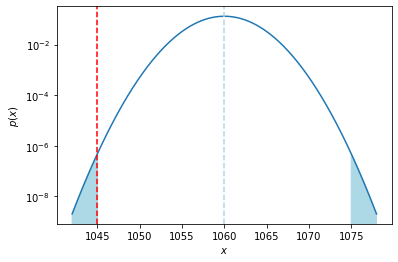

In [2]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

x0 = 1045.
mu = 1060. # Expectation value for the test statistics
sigma = 3.

# determine the Z score
Z = abs(x0 - mu) / sigma
print("Z =", Z)

# plot the measurement and its assumed pdf
w = mu - x0
x = np.linspace(mu - w - 3, w + mu + 3, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y)
plt.fill_between(x, y, where=np.abs(x - mu) > w, color='lightblue')# Area to integrate over
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.yscale("log")
plt.show()

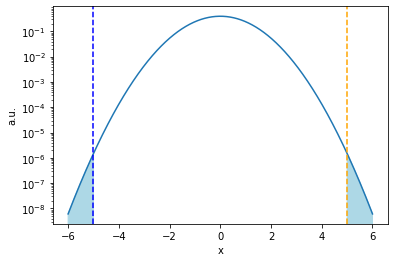

p-value = 5.733031438027285e-07


In [3]:
# plot the test statistics and its pdf
xs = np.linspace(-6, +6, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("x")
plt.yscale("log")
plt.show()

# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
# note that you can surely perform an integral of stats.norm.pdf, but using the cdf is much more convenient
print("p-value =", pvalue)

The probability to observe a jewel melting at temperatures smaller than 1045$^{\circ}$C or larger than 1075$^{\circ}$C is then $\approx 6 \cdot 10^{-7}$, which is smaller then $\alpha$. So it's safe to reject the null hypothesis (the jewel is made of gold), and be legitimately suspicious of the jewel.
**In this case H1 is the opposite of the null hypothesis, rejecting a hypothesis not knowing the alternatives is rather dangerous**

### Student's $t$-Test

The Student's t-test is a statistical test that is used to compare the means of two data samples. In other words, it determines a probability that two populations are the same with respect to the variable tested.

It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or to check if the mean of a distribution significantly differs from the expected value.

The main difference with the $Z$ test is that the variance of the sample is unknown.

The t-test is a parametric test of difference, meaning that it makes the same assumptions on the input data samples:

- they are independent
- they are (approximately) normally distributed
- they have a similar amount of variance within each group **More or less the same variance**

If your data does not fit these assumptions, you have to resort to more complex, nonparametric tests.

Since the variance of the data sample is not known a-priori, the variance is estimated directly from the sample:

$$\sigma^2 = \frac{\sum_i^n (x_i - \bar{x})^2}{n-1}$$

and the test statistics becomes:

$$T = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}$$

where $\bar{x}$ is the sample mean of size $n$, and $\mu$ is the population mean or the expected value.

The distribution of the test statistics $T$ given the number of degrees of freedom $ndof = n-1$ is known under the name of T Student distribution, and is implemented in SciPy in `stats.t`.

Knowing the distribution of the test statistics allows to determine the p-value by finding $\int_{-T}^T p(t)\,dt$ (in case of double-side p-values).

To be precise, the $t$-test and $Z$-test require normality of the sample means, and the $t$-test additionally requires that the sample variance follows a scaled $\chi^2$ distribution, and that the sample mean and sample variance are statistically independent. By the central limit theorem, sample means of large samples are often well-approximated by a normal distribution even if the data are not normally distributed. For non-normal data, the distribution of the sample variance may deviate substantially from a $\chi^2$ distribution, but the if the sample size is large, Slutsky's theorem implies that the distribution of the sample variance has little effect on the distribution of the test statistic.

#### Example:

In a similar same case as in the previous example, we have some jewels, all of the same material, and we want to verify that they are made of gold by measuring the melting temperature. All we know is that the probability distribution for gold melting is normal with mean 1060 $^{\circ}$C; we don't know the standard deviation.
A person brings in 6 samples and they melt at 1035, 1050, 1020, 1055, and 1046$^{\circ}$C. Should we reject the null hpyothesis (they are made of gold)?

T = -3.012727666381777


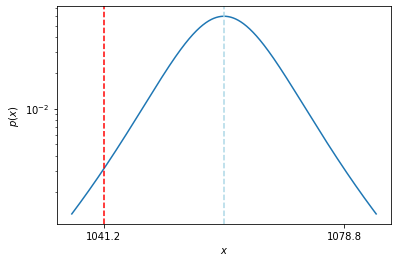

In [4]:
samples = np.array([1035., 1050., 1020., 1055., 1046.]) # input data
sigma = np.sqrt(np.var(samples, ddof=1)) # calculate the variance and its sqrt()
sample_mean = np.mean(samples) # mean of the sample (which is different from mu)
mu = 1060. # the expected value for the mean
n = len(samples) # the size of the data sample
w = mu - sample_mean

# calculate the test statistics
T = (sample_mean - mu) / (sigma / np.sqrt(n))
print("T =", T)

# plot the
x = np.linspace(mu - w - 5, w + mu + 5, 1000)
y = stats.t.pdf(x, loc=mu, scale=sigma / np.sqrt(len(samples)), df=len(samples) - 1)
plt.plot(x, y)
plt.axvline(sample_mean, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.xticks([mu - w, mu + w], [mu - w, mu + w])
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.yscale("log")

plt.show()
# note that this is NOT a plot of the test statistics! This is a plot of the measurements

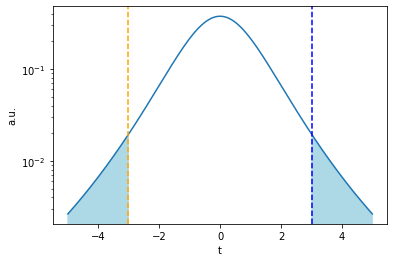

p-value = 0.039444324610338616


In [5]:
# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.yscale("log")


plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

Since the p-value is $< \alpha/2$, we reject the null hypothesis. **So 5%/2=2.5% because the distribution is two sided**

# Numerical integration

Numerical integration, also called quadrature (especially in one-dimension), adresses the basic problem to compute an approximate solution to a definite integral $\int_a^b f(x) dx$ to a given degree of accuracy. **A and be could also be + or - infinity**

$f(x)$ should be a smooth function integrated over a small number of dimensions, and the domain of integration should be bounded.

There are many methods for approximating the integral to the desired precision, which potentially require one whole course per se, which are implemented in the `scipy.integrate` Pythion library. In the following examples, we will see the application of the `integrate` library to solve some common cases.

The most generic integration routine is `scipy.integrate.quad()`, which integrate a one-dimensional function from $a$ to $b$ using a technique (check the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html)) from the Fortran library QUADPACK.

In this example, we compute the integral of a simple function $\int_0^{\pi/2} \sin{\theta}d\theta$, whose result is known analytically (and is 1):

In [6]:
from scipy.integrate import quad, quadrature

# call quad and pass the function, the min and max of the integration interval
# note that the function must be numpy-compliant, e.g. vectorized
# in other words, only numpy functions (np.cos, ...) and vectorized operations (+, -, *, **, ...) are allowed
res, err = quad(np.sin, 0, np.pi/2)

# an alternative method is the gaussian quadrature
#res, err = quadrature(np.sin, 0, np.pi/2)

print(res, "+-", err)
print(np.allclose(res, 1)) # np.allclose() checks that two numpy arrays have all close values

0.9999999999999999 +- 1.1102230246251564e-14
True


In [7]:
# an alternative method is the gaussian quadrature
res, err = quadrature(np.sin, 0, np.pi/2)
print(res, "+-", err)
print(np.allclose(res, 1)) # np.allclose() checks that two numpy arrays have all close values

0.9999999999999535 +- 3.961175831790342e-11
True


Another example of integration of a not-so-simple function:

Result of the integral 16.315541717155426 +- 5.6158704353492794e-09


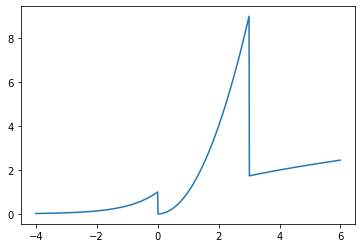

In [8]:
def conditional_function(x):
    if x < 0:
        return np.exp(x)
    if x < 3:
        return x**2
    if x == 3:
        return 0
    if x > 3:
        return np.sqrt(x)
    if x >= 5:
        return np.exp(-x)
    
# converts the regular function into a numpy function, (very important, helps to make the computation efficiently)
np_conditional_function = np.vectorize(conditional_function)

#Integrate it from -4 to 6 using the numpy version
res, err = quad(np_conditional_function, -4, 6) 
print('Result of the integral',res, "+-", err)

x = np.arange(-4, 6, 0.01)
plt.plot(x, np_conditional_function(x))
plt.show()

A more generic function, but less user-friendly, that extends `quad` to multiple dimensions is `nquad` ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.nquad.html)):

In [9]:
from scipy.integrate import nquad

# define functions as lambda
func = lambda x0, x1, x2, x3 : x0**2 + x1*x2 - x3**3 + np.sin(x0) + (1 if (x0 - .2*x3 - .5 - .25*x1 > 0) else 0)
# define integration points
points = [[lambda x1, x2, x3 : 0.2*x3 + 0.5 + 0.25*x1], [], [], []]
# define optional parameters
def opts0(*args, **kwargs):
    return {'points' : [0.2*args[2] + 0.5 + 0.25*args[0]]} 

result, abserr, out = nquad(func, [[0,1], [-1,1], [.13,.8], [-.15,1]], opts=[opts0,{},{},{}], full_output=True)

print(result, "+-", abserr)
print(out)

1.5267454070738635 +- 2.943736000140233e-14
{'neval': 388962}


## Integrating Ordinary Differential Equations

The Python `scipy.integrate` library also features routines for integrating Ordinary Differential Equations (ODE). It cannot handle coupled (PDEs) or boundary problems.

To solve an ODE in Python (and all other programming languages/packages):

 - Convert to standard form
 - Implement the standardized equation as a Python function
 - Create a grid of points where you want to evaluate the ODE
 - Call `scipy.integrate.odeint()` passing the function, initial value, and grid
 
Specifically, `scipy.integrate.odeint()` solves ODE of the form:

$$\frac{dy}{dt} = f(y1, y2, .., t0, ...)$$



### First order ODEs

 - $\frac{dC(t)}{dt}=−rC(t)$ (chemical reaction)
 - $R\frac{di(t)}{dt} + \frac{i(t)}{C} = 0$ (RC circuits)
 - $L\frac{di(t)}{dt} + R i(t) = V$ (RL circuits)
 
these are a 1-st order ODE, already in standard form or that can be expressed in the standard form with trivial operations.

As an example, let us solve the ODE $\frac{dy}{dt} = -2 y$ between $t = 0 \dots 4$, with the initial condition $y(t=0) = 1$:

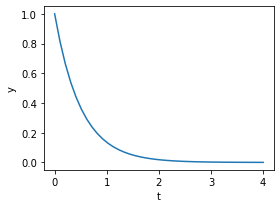

In [10]:
from scipy.integrate import odeint

# first the function computing the derivative of the position needs to be defined
def derivative(ypos, time):
    return -2 * ypos

# define the interval (The grid)
time_vec = np.linspace(0, 4, 40)

# call the odeint() method
y = odeint(derivative, y0=1, t=time_vec)

# plot the function
plt.figure(figsize=(4, 3))
plt.plot(time_vec, y)
plt.xlabel('t')
plt.ylabel('y')
plt.tight_layout()

### Second order ODEs

- $\frac{d^2 x(t)}{dt^2} + k x(t) = 0$ (non-damped oscillation)
- $\frac{d^2 x(t)}{dt^2} + 2 \varepsilon \omega_0  \frac{dx(t)}{dt} + \omega_0^2 x(t) = 0$ (damped oscillation, like in a mass-spring system or RLC circuit)

The "trick" for the 2-nd order ODEs is to create a second dimension, the dimensions of the derivative, which turns the problem into a 2D 1-st order ODE.

#### Example: the mass-spring system

In the case of the non-damped oscillation system, we'll use a $x_1(t)=x(t)$ and $x_2(t)=\frac{dx(t)}{dt}$.
So the equation becomes:

$$\frac{x_2(t)}{dt} + k x_1 (t) = 0$$
and thus
$$\frac{x_2(t)}{dt} = - k x_1 (t)$$
$$\frac{x_1(t)}{dt} = x_2(t)$$
Now we have two dimensions and their ODEs are both in standard form.

#### Example: the damped mass-spring system

Let's see a solution for the damped spring mass system.
The position of a mass attached to a spring obeys the 2-nd order ODE reported above, with $\omega_0^2 = k/m$ with $k$ the spring constant, $m$ the mass and $\varepsilon = c/(2 m \omega_0)$ with $c$ the damping coefficient.

In [11]:
# set the constants
mass = 0.5  # kg
kspring = 4  # N/m
cviscous = 0.4  # N s/m

# and thus
eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)

The 2-nd order equation needs to be transformed in a system of two first-order equations for the vector $Y = (y, y')$**One is the function you care about, the other is its derivative**. This can be done by exploiting 2D numpy arrays. The function computes the velocity and acceleration. In this case, the two 1-st order ODEs are:

$$\frac{x_1(t)}{dt} = x_2(t)$$
$$\frac{x_2(t)}{dt} = - \varepsilon \omega_0 x_1 (t) - \omega_0^2 x_2(t)$$

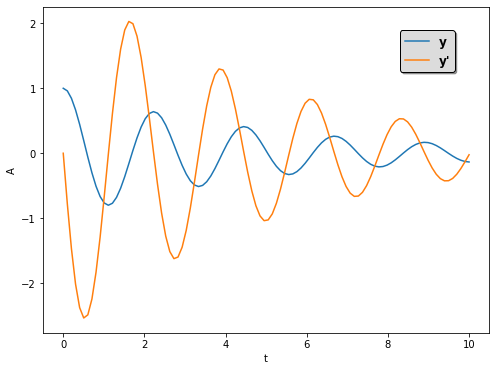

In [12]:
def derivative(yvec, time, eps, omega):
    return(yvec[1], -eps * omega * yvec[1] - omega**2 * yvec[0])

time_vec = np.linspace(0, 10, 100)
yinit = (1, 0)
yarr = odeint(derivative, yinit, time_vec, args=(eps, omega))

# plot y and y'
plt.figure(figsize=(8, 6))
plt.plot(time_vec, yarr[:, 0], label='y')
plt.plot(time_vec, yarr[:, 1], label="y'")
plt.xlabel('t')
plt.ylabel('A')
plt.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'weight':'bold','size':12}, loc=[0.8,0.8])



# Fast Fourier Trasform

The Fourier Transform (FT) is a mathematical transform that decomposes functions that depend on space or time into functions depending on spatial or temporal frequency.

It is often used to filter the noise from a periodic signal and investigate features in the frequency space.

The `scipy.fftpack` module computes fast Fourier transforms (FFTs) and offers utilities to handle them. The main functions are:

* `scipy.fftpack.fft()` to compute the FFT
* `scipy.fftpack.fftfreq()` to generate the sampling frequencies
* `scipy.fftpack.ifft()` computes the inverse FFT, from frequency space to signal space

Let's see a practical example, generating a periodic signal (using a `np.sin` function) and adding on top some random noise:
**Tells us the relevant frequencies**

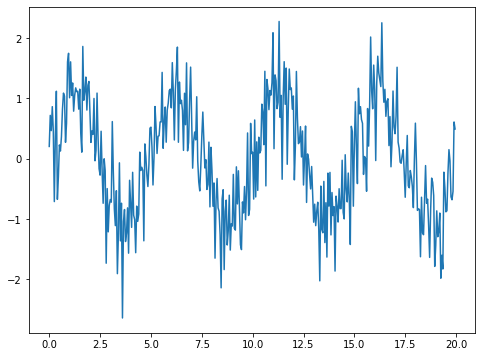

In [13]:
from scipy import fftpack

time_step = 0.05
ang_freq = 0.2
period = 1. / ang_freq
# define the time range
time_vec = np.arange(0, 20, time_step)
# define the function as signal + noise
sig = (np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(8, 6))
plt.plot(time_vec, sig, label='Original signal')

Let's now compute and plot the power spectrum using `fftpack.fft` ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html)):

Peak frequency: 0.2
Does the peak correspond to the initial frequency? True


[]

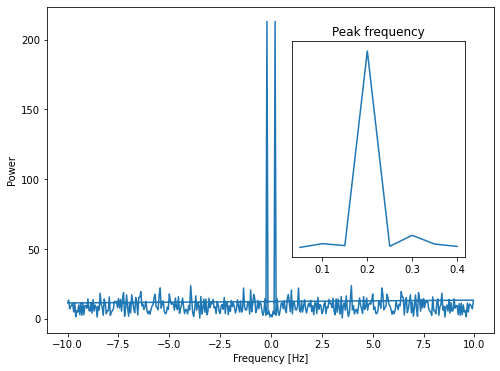

In [14]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft) # these are the "weights" of the Fourier components for each discrete frequency interval
# How relevant is a given frequency

# The return the corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(8, 6))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

# Find the peak frequency: focus only on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
powes = power[pos_mask]
# find the max of freqs array
peak_freq = freqs[powes.argmax()]
print("Peak frequency:", peak_freq)

# Check that it does indeed correspond to the frequency that we generate the signal with
print("Does the peak correspond to the initial frequency?", np.allclose(peak_freq, ang_freq))

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], powes[:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced peak detection
# We consider only the positives frequencies

Now, we want to create a filter that removes the random noise and returns the periodic signal. We can observe that the random noise populates the high frequency part of the spectrum, so we may want to remove these:

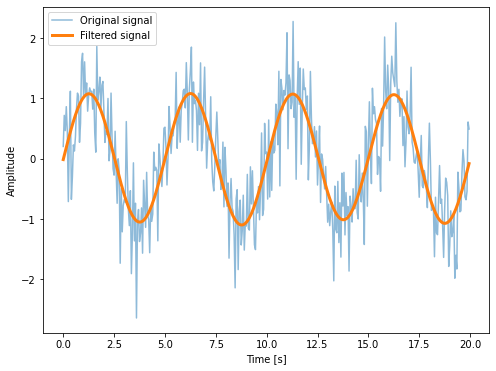

In [15]:
high_freq_fft = sig_fft.copy()
# filter (set to zero) all high frequency components that are larger than peak_freq
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
# calculate the Inverse Fast Fourier Transform
filtered_sig = fftpack.ifft(high_freq_fft)
# only take the real part
real_filtered_signal = np.real(filtered_sig)

# plot the result of the IFFT
plt.figure(figsize=(8, 6))
plt.plot(time_vec, sig, alpha=0.5, label='Original signal')
plt.plot(time_vec, real_filtered_signal, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')